In [1]:
import sklearn.neighbors

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
euc = sklearn.neighbors.DistanceMetric.get_metric('euclidean')

In [4]:
from jaratoolbox import loadopenephys
from jaratoolbox import spikesorting
from jaratoolbox.test.nick import clustercutting
from matplotlib import pyplot as plt
import os
import numpy as np

In [5]:
animalName='pinp013'
ephysLoc = '/home/nick/data/ephys/'
ephysPath = os.path.join(ephysLoc, animalName)
ephysFn='2016-05-27_14-13-26'
tetrode=3
spikesFn = os.path.join(ephysPath, ephysFn, 'Tetrode{}.spikes'.format(tetrode))
dataSpikes = loadopenephys.DataSpikes(spikesFn)

In [6]:
len(dataSpikes.samples)

10111

In [7]:
#GAIN = 5000.0
#SAMPLING_RATE=30000.0
#dataSpikes.samples = ((dataSpikes.samples - 32768.0) / GAIN) * 1000.0
#dataSpikes.timestamps = dataSpikes.timestamps/SAMPLING_RATE

(numSpikes, numChans, numSamples) = shape(dataSpikes.samples)
allWaves = dataSpikes.samples.reshape(numSpikes, numChans*numSamples)

In [8]:
spikesToUse = random.randint(len(allWaves), size=1000) #Only use some of the spikes for now
wavesToUse = allWaves[spikesToUse, :]

In [9]:
X_dist = euc.pairwise(wavesToUse)

In [10]:
from sklearn.manifold import TSNE

In [11]:
import timeit
start_time = timeit.default_timer()

model = TSNE(n_components=2, method='barnes_hut', verbose=20, n_iter=1000)
Y = model.fit_transform(wavesToUse)

elapsed = timeit.default_timer() - start_time
print 'ELAPSED TIME: {} mins'.format(elapsed/60)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 312.274894
[t-SNE] Iteration 25: error = 1.3697388, gradient norm = 0.0179968
[t-SNE] Iteration 50: error = 1.3613247, gradient norm = 0.0181911
[t-SNE] Iteration 75: error = 1.0027137, gradient norm = 0.0101352
[t-SNE] Iteration 100: error = 1.0242578, gradient norm = 0.0123768
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.024258
[t-SNE] Iteration 125: error = 0.9281195, gradient norm = 0.0076184
[t-SNE] Iteration 150: error = 0.9502608, gradient norm = 0.0094917
[t-SNE] Iteration 175: error = 0.9646636, gradient norm = 0.0107351
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 1.024258
ELAPSED TIME: 0.0862698833148 mins


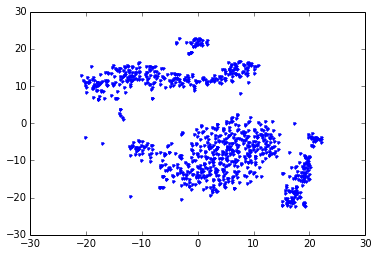

In [12]:
plot(Y[:,0], Y[:,1], '.')

In [19]:
import sklearn.mixture

In [20]:
mixture = sklearn.mixture.GMM(n_components=12) #Gaussian mixture modeling looks like it might work well. 

In [24]:
mixture.fit(Y)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=12, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [25]:
mixture.predict(Y)

array([10,  3, 10,  9,  1,  7, 10,  7, 11, 11,  9, 10,  9,  3,  9,  5,  7,
       11, 10,  5,  3, 10,  9,  1, 10,  1,  9, 10,  8,  3,  4, 10, 10,  3,
        7, 11,  9, 10, 10, 10, 11,  6,  3, 11, 10,  5,  2,  5,  2,  7, 10,
       10, 11, 10,  4,  9, 10,  9, 10,  4,  8,  5, 10, 11,  9, 10, 10,  7,
        4,  9,  9,  7,  7,  3,  9, 10,  6, 10,  3,  6,  8, 11,  6, 11,  7,
        3, 11,  6, 11, 10,  8, 11,  4,  7, 10, 11, 10,  9,  7,  4, 11, 10,
       10,  6, 10,  7,  8,  9,  8, 11,  9,  8, 10,  9,  9,  4,  9, 10,  9,
       10, 10, 10,  9, 10,  1, 10,  3,  3, 10,  9,  9,  8, 11,  8,  9,  9,
        1,  1,  1,  1, 10,  7,  0,  4,  2,  4,  7,  0,  9, 10,  7,  4, 10,
        8,  4, 10,  4,  7,  9,  7,  8, 11,  9, 11, 11,  8,  7, 10,  9, 10,
        7,  8,  9,  2, 10,  9,  9, 10,  7, 11,  9, 10,  3, 11,  4, 10,  3,
       11,  6,  3, 10,  5,  9,  9,  3,  3, 11,  7, 10,  6,  9,  1,  1, 10,
        2,  5,  7,  2,  0,  5, 10, 10,  7,  8,  0,  9, 11,  8,  3,  5,  5,
        5,  4, 11, 11,  8

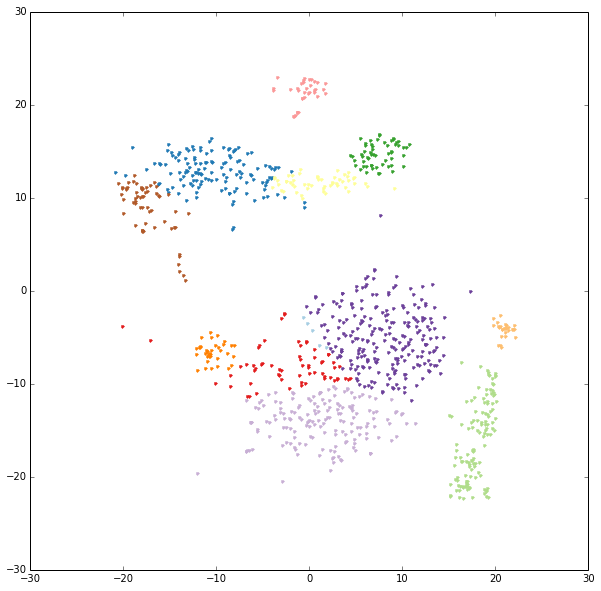

In [23]:
figure(figsize=(10, 10))
uniqueLabels = np.unique(cluster_labels)
colors = plt.cm.Paired(np.linspace(0, 1, len(uniqueLabels)))
for indLabel, label in enumerate(unique(cluster_labels)):
    hold(1)
    indsThisLabel = np.flatnonzero(cluster_labels==label)
    plot(Y[indsThisLabel, 0], Y[indsThisLabel, 1], '.', color=colors[indLabel])

In [97]:
import timeit
start_time = timeit.default_timer()

model = TSNE(n_components=2, method='barnes_hut', verbose=20, n_iter=1000, metric='precomputed')
Y = model.fit_transform(X_dist)

elapsed = timeit.default_timer() - start_time
print 'ELAPSED TIME: {} mins'.format(elapsed/60)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.944425
[t-SNE] Iteration 25: error = 1.4007232, gradient norm = 0.0194313
[t-SNE] Iteration 50: error = 1.3688711, gradient norm = 0.0202096
[t-SNE] Iteration 75: error = 1.0311652, gradient norm = 0.0122536
[t-SNE] Iteration 100: error = 1.0379034, gradient norm = 0.0141325
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.037903
[t-SNE] Iteration 125: error = 0.9480730, gradient norm = 0.0118740
[t-SNE] Iteration 150: error = 1.0017443, gradient norm = 0.0117694
[t-SNE] Iteration 175: error = 1.0400749, gradient norm = 0.0123166
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 1.037903
ELAPSED TIME: 0.0789584477743 mins


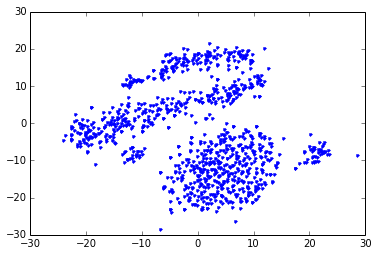

In [98]:
plot(Y[:,0], Y[:,1], '.')

In [13]:
sigma = 0.1

In [28]:
import sklearn.neighbors

In [31]:
a = array([[1, 1], [2, 2], [3, 3]])
dist = euc.pairwise(a)
dist

array([[ 0.        ,  1.41421356,  2.82842712],
       [ 1.41421356,  0.        ,  1.41421356],
       [ 2.82842712,  1.41421356,  0.        ]])

In [39]:
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=3, algorithm='auto').fit(a)
distances, indices = nbrs.kneighbors(a)
distances[:,-1]

array([ 2.82842712,  1.41421356,  2.82842712])

In [14]:
def determine_sigma_from_X(X, k_nb, local=True):
    #Adapted from KMap Toolbox by Barbara Hammer's group
    #Just needs the raw vectors, not a distance matrix
    
    k = k_nb + 1 ##### We add 1 to the number of the neighbor to return because the first will always be zero (dist to self)
    
    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    if local:
        return distances[:,-1] #Return distances to last (kth)
    else:
        return mean(distances[:,-1]) #Return average distance to the kth neighbor

In [15]:
def determine_sigma(X_dist, k_nb, local=True):
    #Uses numpy quicksort, not sure how fast it will be. 
    #FIXME: might need to work on this more, the toolbox updates to exclude more zeros
    
    sortedDist = np.sort(X_dist, axis=0)
    
    if local:
        return sortedDist[k_nb, :]
    else:
        raise NotImplemented

In [54]:
sig = determine_sigma(dist, 2)
sig

array([ 2.82842712,  1.41421356,  2.82842712])

In [55]:
dist / sig #makes quick work of porting bsxfun(@rdivide, X_dist, Par.sig_nb)

array([[ 0. ,  1. ,  1. ],
       [ 0.5,  0. ,  0.5],
       [ 1. ,  1. ,  0. ]])

In [58]:
Ker = exp(-1*(dist/sig))

In [59]:
Ker

array([[ 1.        ,  0.36787944,  0.36787944],
       [ 0.60653066,  1.        ,  0.60653066],
       [ 0.36787944,  0.36787944,  1.        ]])

In [67]:
rowSum = np.sum(Ker, 1)
rowSum

array([ 1.73575888,  2.21306132,  1.73575888])

In [75]:
rowSum.reshape((1, 3))

array([[ 1.73575888,  2.21306132,  1.73575888]])

In [76]:
Ker / rowSum[:, np.newaxis]

array([[ 0.57611688,  0.21194156,  0.21194156],
       [ 0.27406862,  0.45186276,  0.27406862],
       [ 0.21194156,  0.21194156,  0.57611688]])

In [78]:
Ker = Ker / rowSum[:, np.newaxis]

np.linalg.pinv(Ker)

array([[ 4.01768295, -1.95497378, -0.74858965],
       [-1.98280532,  7.26914347, -1.98280532],
       [-0.74858965, -1.95497378,  4.01768295]])

In [16]:
def kmap_train(X_dist, Y, sigma_scale):
    #Ported from KMap Toolbox by Barbara Hammer's group
    
    k_nb = 10 # Number of neighbors to use
    f_local =1 # 0 for global, 1 for local

    sig_nb=determine_sigma(X_dist, k_nb, f_local);
    sig_nb = sig_nb**2
    sib_nb = sig_nb * sigma_scale #Scale the sigma values
    
    #Compute the kernel
    kernel = np.exp(-1*(X_dist/sig_nb))
    
    #Divide each row by the row sum (use newaxis trick to get broadcasting to behave)
    kernel = kernel / np.sum(kernel, 1)[:,np.newaxis]
    
    A = np.dot(np.linalg.pinv(kernel), Y)
    
    return A, sig_nb

In [17]:
A, sig_nb = kmap_train(X_dist, Y, 0.1)

In [100]:
# Test dataset
spikesToUse = random.randint(len(allWaves), size=5000) #Only use some of the spikes for now
testWaves = allWaves[spikesToUse, :]


In [109]:
#Dist between train and test datasets
X_dist_ose = sklearn.metrics.pairwise.euclidean_distances(allWaves, wavesToUse)
shape(X_dist_ose)

(10111, 1000)

In [110]:
def kmap_test(X_dist_ose, A, sig_nb):
    kernel_ose = np.exp(-1*(X_dist_ose/sig_nb))
    
    #Divide each row by the row sum (use newaxis trick to get broadcasting to behave)
    kernel_ose = kernel_ose / np.sum(kernel_ose, 1)[:,np.newaxis]
    
    Y_ose = np.dot(kernel_ose, A)
    
    return Y_ose

In [111]:
Y_ose = kmap_test(X_dist_ose, A, sig_nb)

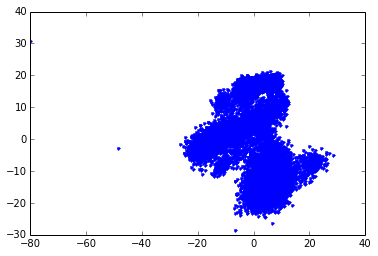

In [112]:
plot(Y_ose[:,0], Y_ose[:,1], '.')

In [114]:
import hdbscan
clus = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clus.fit_predict(Y_ose)

/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py:1268: UserWarning: /home/nick/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


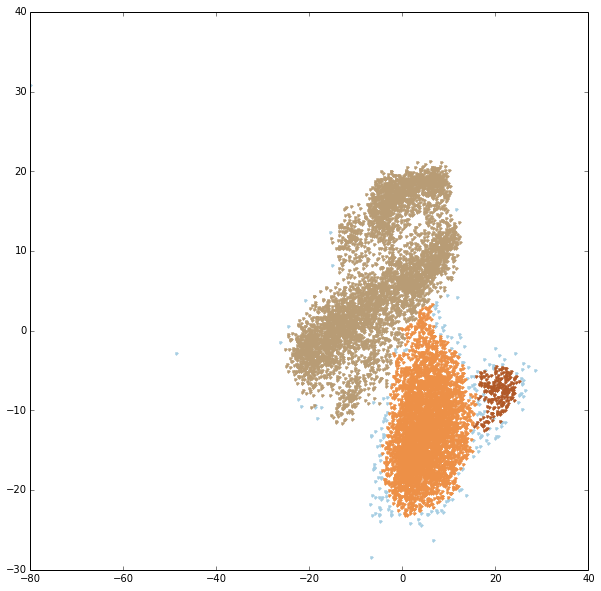

In [116]:
figure(figsize=(10, 10))
uniqueLabels = np.unique(cluster_labels)
colors = plt.cm.Paired(np.linspace(0, 1, len(uniqueLabels)))
for indLabel, label in enumerate(unique(cluster_labels)):
    hold(1)
    indsThisLabel = np.flatnonzero(cluster_labels==label)
    plot(Y_ose[indsThisLabel, 0], Y_ose[indsThisLabel, 1], '.', color=colors[indLabel])

In [134]:
animalName='adap020'
ephysLoc = '/home/nick/data/ephys/'
ephysPath = os.path.join(ephysLoc, animalName)
ephysFn='2016-05-25_16-33-09'
tetrode=2
spikesFn = os.path.join(ephysPath, ephysFn, 'Tetrode{}.spikes'.format(tetrode))
dataSpikes = loadopenephys.DataSpikes(spikesFn)

In [135]:
(numSpikes, numChans, numSamples) = shape(dataSpikes.samples)
allWaves = dataSpikes.samples.reshape(numSpikes, numChans*numSamples)

In [137]:
spikesToUse = random.randint(len(allWaves), size=5000) #Only use some of the spikes for now
wavesToUse = allWaves[spikesToUse, :]

In [138]:
X_dist = euc.pairwise(wavesToUse)

In [139]:
import timeit
start_time = timeit.default_timer()

model = TSNE(n_components=2, method='barnes_hut', verbose=20, n_iter=1000, metric='precomputed')
Y = model.fit_transform(X_dist)

elapsed = timeit.default_timer() - start_time
print 'ELAPSED TIME: {} mins'.format(elapsed/60)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 6.650410
[t-SNE] Iteration 25: error = 1.8181822, gradient norm = 0.0096474
[t-SNE] Iteration 50: error = 1.7733963, gradient norm = 0.0054940
[t-SNE] Iteration 75: error = 1.6334172, gradient norm = 0.0017734
[t-SNE] Iteration 100: error = 1.6030693, gradient norm = 0.0014694
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.603069
[t-SNE] Iteration 125: error = 1.5512971, gradient norm = 0.0010687
[t-SNE] Iteration 150: error = 1.5346128, gradient norm = 0.0009668
[t-SNE] Iteration 150: gradient norm 0.000967. Finished.
[t-SNE] Error after 150 iterations: 1.603069
ELAPSED TIME: 0

In [140]:
start_time = timeit.default_timer()
A, sig_nb = kmap_train(X_dist, Y, 0.1)
elapsed = timeit.default_timer() - start_time
print 'ELAPSED TIME: {} mins'.format(elapsed/60)

ELAPSED TIME: 3.26624031862 mins


In [144]:
chunkWaves = allWaves[0:100000, :]

In [ ]:
X_dist_ose = sklearn.metrics.pairwise.euclidean_distances(chunkWaves, wavesToUse)
shape(X_dist_ose)

In [26]:
len(allWaves)

10111

In [27]:
1000000/5000.0

200.0

In [28]:
200*30/60

100

In [ ]:
fd